<a href="https://colab.research.google.com/github/inf032/introducaoML/blob/master/00_Introdu%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import warnings

# Lendo a base de dados com pandas

In [6]:
np.random.seed(42)
warnings.filterwarnings(action='once')

dfAgua = pd.read_csv('https://raw.githubusercontent.com/inf032/introducaoML/master/data/potabilidade_agua.csv')
dfAgua.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Observando as dimensões do dataframe - linhas e colunas


In [7]:
dfAgua.shape

(3276, 10)

In [9]:
dfAgua.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [10]:
dfAgua.dtypes

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [11]:
dfAgua.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [12]:
dfAgua.columns.values

array(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate',
       'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity',
       'Potability'], dtype=object)

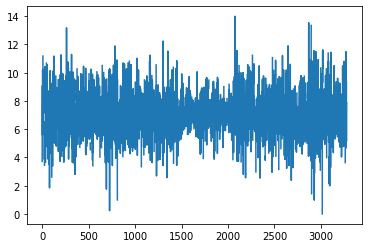

In [14]:
dfAgua.ph.plot()

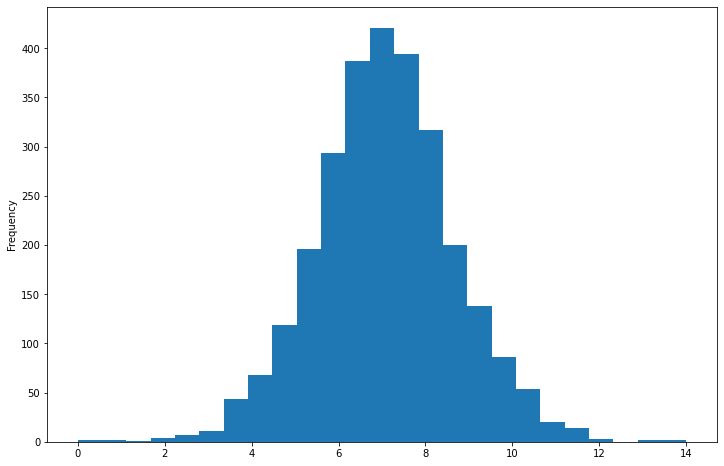

In [28]:
dfAgua.ph.plot(kind='hist', bins=25, figsize=(12,8))

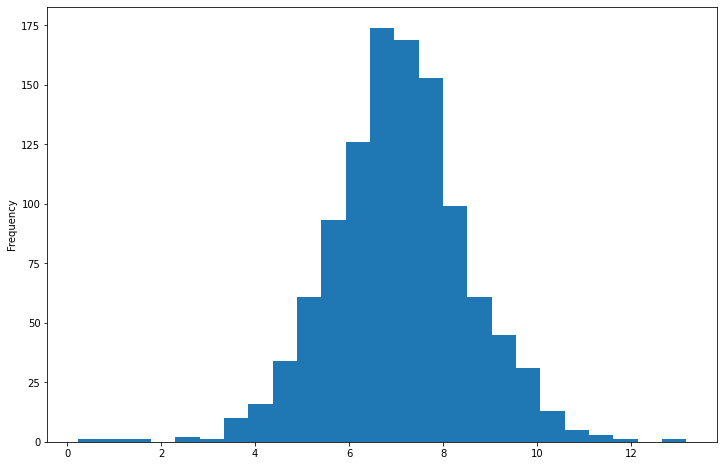

In [30]:
dfAgua.query("Potability == 1").ph.plot(kind='hist', bins=25, figsize=(12,8))

In [31]:
dfAgua.groupby("Potability").ph.mean()

Potability
0    7.085378
1    7.073783
Name: ph, dtype: float64

In [32]:
faixas = [0, 3, 6, 9, 12, 14]
labels = ['0 a 3', '3 a 6', '6 a 9', '9 a 12', '12 a 14']
faixas_ph = pd.cut(x=dfAgua.ph, bins=faixas, include_lowest = True, labels = labels)
faixas_ph.value_counts(sort=False)

0 a 3        20
3 a 6       625
6 a 9      1833
9 a 12      302
12 a 14       5
Name: ph, dtype: int64

In [35]:
faixas_ph

0          NaN
1        3 a 6
2        6 a 9
3        6 a 9
4       9 a 12
         ...  
3271     3 a 6
3272     6 a 9
3273    9 a 12
3274     3 a 6
3275     6 a 9
Name: ph, Length: 3276, dtype: category
Categories (5, object): ['0 a 3' < '3 a 6' < '6 a 9' < '9 a 12' < '12 a 14']

In [40]:
media_ph = dfAgua.ph.mean()
mediana_ph = dfAgua.ph.median()
#moda_ph = dfAgua.ph.mode()

print(f'Media do ph da agua: {round(media_ph, 2)}')
print(f'Mediana do ph da agua: {round(mediana_ph, 2)}')
#print(f'Moda do ph da agua: {round(moda_ph, 2)}')

Media do ph da agua: 7.08
Mediana do ph da agua: 7.04


In [41]:
desvio_medio_abs_ph = dfAgua.ph.mad()
variancia_ph = dfAgua.ph.var()
desvio_padrao_ph = dfAgua.ph.std()

print(f'Desvio Médio Absoluto do ph da agua: {round(desvio_medio_abs_ph, 2)}')
print(f'Variância do ph da agua: {round(variancia_ph, 2)}')
print(f'Desvio Padrão do ph da agua: {round(desvio_padrao_ph, 2)}')

Desvio Médio Absoluto do ph da agua: 1.24
Variância do ph da agua: 2.54
Desvio Padrão do ph da agua: 1.59


In [42]:
dfAgua.ph.quantile([0.25, 0.5, 0.75, 1])

0.25     6.093092
0.50     7.036752
0.75     8.062066
1.00    14.000000
Name: ph, dtype: float64

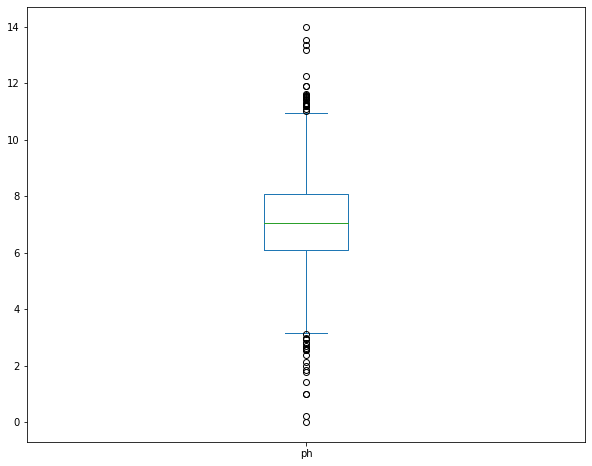

In [43]:
dfAgua.ph.plot.box(figsize=(10,8))

Text(0, 0.5, 'Total de Amostras')

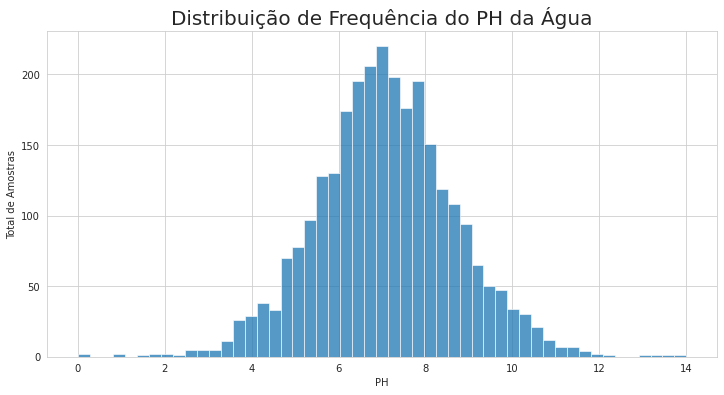

In [50]:
import seaborn as sns

sns.set_style("whitegrid")
ax = sns.histplot(data=dfAgua.ph, palette=sns.color_palette("husl", n_colors=1))
ax.set_title('Distribuição de Frequência do PH da Água', fontsize = 20)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('PH')
ax.set_ylabel('Total de Amostras')

Text(0, 0.5, 'Total de Amostras')

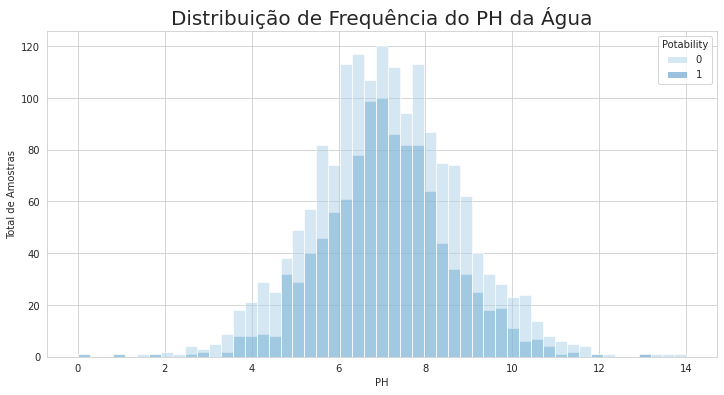

In [57]:
sns.set_style("whitegrid")
ax = sns.histplot(data=dfAgua, x='ph', palette=sns.color_palette("Blues", n_colors=2), hue='Potability')
ax.set_title('Distribuição de Frequência do PH da Água', fontsize = 20)
ax.figure.set_size_inches(12,6)
ax.set_xlabel('PH')
ax.set_ylabel('Total de Amostras')